## Importing Libraries

In [2]:
import pandas as pd #useful for loading the dataset
import numpy as np #to perform array operations

## Choosing dataset from local libraries

In [1]:
from google.colab import files
uploaded = files.upload() 

Saving salary.csv to salary.csv


## Load dataset

In [3]:
dataset = pd.read_csv('salary.csv')

## Summarize Dataset

In [4]:
print(dataset.shape)
print(dataset.head(5))

(48842, 5)
   age  educational-num  capital-gain  hours-per-week income
0   25                7             0              40  <=50K
1   38                9             0              50  <=50K
2   28               12             0              40   >50K
3   44               10          7688              40   >50K
4   18               10             0              30  <=50K


In [5]:
print(dataset.tail(5))

       age  educational-num  capital-gain  hours-per-week income
48837   27               12             0              38  <=50K
48838   40                9             0              40   >50K
48839   58                9             0              40  <=50K
48840   22                9             0              20  <=50K
48841   52                9         15024              40   >50K


## Mapping salary data to Binary value

In [8]:
income_set = set(dataset['income'])
dataset['income']=dataset['income'].map({'<=50K':0,'>50K':1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  educational-num  capital-gain  hours-per-week  income
0       25                7             0              40       0
1       38                9             0              50       0
2       28               12             0              40       1
3       44               10          7688              40       1
4       18               10             0              30       0
...    ...              ...           ...             ...     ...
48837   27               12             0              38       0
48838   40                9             0              40       1
48839   58                9             0              40       0
48840   22                9             0              20       0
48841   52                9         15024              40       1

[48842 rows x 5 columns]>


## Segregate data into X(Input/Independent Variable) & Y(Output/Dependent Variable)

In [9]:
X = dataset.iloc[:,:-1].values
X

array([[   25,     7,     0,    40],
       [   38,     9,     0,    50],
       [   28,    12,     0,    40],
       ...,
       [   58,     9,     0,    40],
       [   22,     9,     0,    20],
       [   52,     9, 15024,    40]])

In [10]:
Y=dataset.iloc[:,-1].values
Y

array([0, 0, 1, ..., 0, 0, 1])

## Splitting dataset into train & test

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0) #that means 25% data for testing and 75% for training

## Feature Scaling

### We scale our data to make all the features contribute equally to the result     

### Fit_transform - fit method is calculating the mean and variance of each of the features present in our data

### Transform - Transfrom method is transforming all the features using the respective mean and variance 

### We want our test data to be a completely new and a surprise set for our model

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train)

[[-1.28809411 -0.02849543 -0.14417446 -0.43640821]
 [ 0.38707682 -0.02849543 -0.14417446  0.77081039]
 [-0.851093   -0.41739861 -0.14417446 -0.03400201]
 ...
 [ 1.18824553  2.30492366 -0.14417446  1.17321658]
 [-0.70542596 -1.19520498 -0.14417446 -2.8508454 ]
 [ 1.4795796   1.5271173  -0.14417446 -2.60940168]]


## Finding the best K-Value

Text(0, 0.5, 'Mean error')

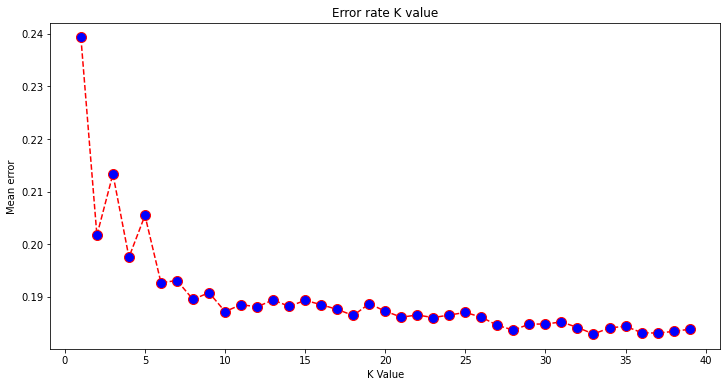

In [17]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1,40):
 model=KNeighborsClassifier(n_neighbors=i)
 model.fit(X_train,y_train)
 pred_i=model.predict(X_test)
 error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean error') 

## Training

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=16,metric='minkowski',p=2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16)

## Prediction

In [20]:
age = int(input("Enter new Employee's Age: "))
edu = int(input("Enter new Employee's education : "))
cg = int(input("Enter new Employee's Capital Gain : "))
wh = int(input("Enter new Employee's Hour's Per Week : "))
newEmp = [[age,edu,cg,wh]]
result=model.predict(sc.transform(newEmp))
print(result)
if result==1 :
 print("Employee might get salary above 50K ")
else:
 print("Employee might not get salary above 50K ") 

Enter new Employee's Age: 75
Enter new Employee's education : 10
Enter new Employee's Capital Gain : 0
Enter new Employee's Hour's Per Week : 75
[0]
Employee might not get salary above 50K 


## Prediction for all test data

In [21]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]


## Checking accuracy of the model

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cm)
print("Accuracy of the model: {0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion Matrix: 
[[8843  430]
 [1872 1066]]
Accuracy of the model: 81.14814511506019%
